<style>
  h1 {text-align:center;}
  h2 {text-align:center;}
  h3 {text-align:center;}
</style>

<center><img src="https://i.ytimg.com/vi/kHfd0Jt0AvA/maxresdefault.jpg" width= "900" height= "500"></center>

# The Probabilities and Financial Impact of Gacha Games

<h1 style= 'font-family:Lucida Handwriting'>Genshin Impact</h1>

### Kevin Wang and Nick Zhang


## Introduction 
Genshin Impact is a free-to-play action role-playing game developed and published by miHoYo. The game features a fantasy open world environment and action based battle system using elemental magic, character switching and uses gacha game monetization for players to obtain new characters, weapons, and other resources. The game is online-only and features limited co-op mode, allowing up to four players to play together. It was released on September 28, 2020. About 21.3 million people registered for the game, with 17 million downlods at the games launch. Read more about Genshin Impact, and download the game for youself today: [Genshin Impact](https://genshin.mihoyo.com/en/home)

## The Potential Plight of Gacha Games
Gacha games contain the gacha mechanic, similar to the capsule toy vending machine idea. Players spend in-game currency to  recieve a random virtual item. Genshin Impact gacha rolls contain the following prizes: 3 Star Weapons, 4 Star Weapons, 4 Star Characters, 5 Star Weapons, and 5 Star Characters. Of course, higher the star ranking, higher the rarity of the item, and higher the appeal. Countless players have spent thousands of dollars of games such as Genshin Impact, even though it is free-to-play.

## Our Objectives
We will anaylze the probabilities of attaining the highest ranking items possible, as well as determining the average cost of rolling one 5 star item. Furthermore, we will test to see if there there is a strong positive relationship between money and the number of 5 star achieved, i.e the more money one spends would it lead to more 5 stars? We will then determine the financial costs of these gacha rolls and the investment into Genshin Impact for different player groups. Finally, we will calculate the financial impact of attaining one 5 Star on the typical, young adult, single-person household. Personally, since we also love playing this game, we are interested in the math and statistics behind Genshin Impact's built-in gambling system, and we hope that others will also be interested in the financial impact behind paying to have a strong team of characters in the game.

## Collecting Wishes Data
Gacha rolls in Genshin Impact are called wishes. We manually simulated and recorded 500 10-item rolls using the following simulator: [Wish Simulator](https://gi-wish-simulator.uzairashraf.dev/). Go ahead, try your luck!
Since our data is straightforward and manually collected to our specifications, there was no need to tidy or modify our data. We immediately processed the data from a csv into a Pandas dataframe.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as scipy
import numpy as np
import random as ra
# pd.set_option("display.max_rows", None, "display.max_columns", None)


In [2]:
data = pd.read_csv('data.csv')
data = data.dropna(axis= 1)
data.head()

,3StarWeap,4StarWeap,5StarWeap,4StarChar,5StarChar
0,8,0,0,2,0
1,9,0,0,1,0
2,9,0,0,1,0
3,9,0,0,1,0
4,9,0,0,1,0


With the dataframe above, let us calcuate the sum of each star rating item we rolled.

In [3]:
sumData = pd.DataFrame(data= data.sum()).rename(columns={0: 'Sum'})
sumData

,Sum
3StarWeap,4260
4StarWeap,359
5StarWeap,34
4StarChar,304
5StarChar,43


Let us visualize the odds better with a simple barplot. Spoiler, the odds are horrendous.

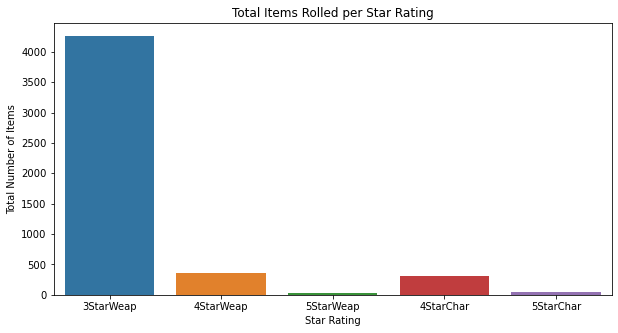

In [4]:
plt.figure(figsize=(10,5))
sns.barplot(x= sumData.index, y= 'Sum', data= sumData)
plt.title('Total Items Rolled by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Total Number of Items')
plt.show()

Now we will count and record the number of rolls between each 5 star attained and compute the average distance, based on our data above.

Based of our own simulated rolls, the average number of rolls between 5 Star Summons (Weapons or Characters): 55
A histogram below shows the frequency of rolls of 10 between each 5 star item we attained in our simulation


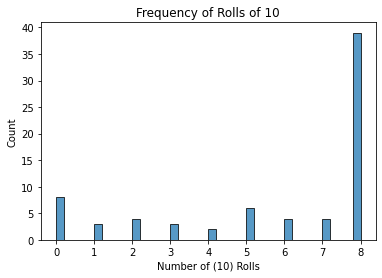

In [5]:
freq = pd.DataFrame(columns= ['Number of (10) Rolls'])
count = 0
sumDistances= 0
data['response'] = pd.Series(0, index=data.index)
item = 1

for w, c, index in zip(data['5StarWeap'].to_numpy(), data['5StarChar'].to_numpy(), data.index):
    if (w > 0) or (c > 0):
        data.loc[index, 'response'] = item
        item += 1
        #Add count to the frequency dataframe
        freq.loc[index] = count
        #Add distance to sum
        sumDistances += count
        #Resets the distnace counter
        count = 0
    else:
        count+= 1

sns.histplot(data= freq, x="Number of (10) Rolls", binwidth= .2).set_title('Frequency of Rolls of 10')
#We are summing the distances between each 5 star item, then dividing the distances over the number of 5 stars attained to compute avg rolls per 5 star.
print('Based of our own simulated rolls, the average number of rolls between 5 Star Summons (Weapons or Characters):' , round(10*(sumDistances/(data['5StarChar'].sum()+ data['5StarWeap'].sum()))))
print('A histogram below shows the frequency of rolls of 10 between each 5 star item we attained in our simulation. As you can see, there were more instances of having to roll 8 ten rolls (or 80 rolls), before we could attain a 5 star in the next 10 rolls.')



## Fitting a Linear Model
We could use the value above to say that a player would, on average, need to roll 55 times to get a 5 star summon (weapon or character). However, we can double check by trying to fit a linear model.

In [6]:
linear_model = data[data['response'] != 0]
linear_model['index'] = linear_model.index

import statsmodels.formula.api as sm
ols = sm.ols('response~index', data = linear_model).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.606e+04
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           7.73e-98
Time:                        14:39:17   Log-Likelihood:                -98.600
No. Observations:                  73   AIC:                             201.2
Df Residuals:                      71   BIC:                             205.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4255      0.213     11.379      0.0

We can see that the p-value assosiated with our F-statistic is extremely small (almost zero), meaning that our linear model is a good fit. Also, we can see that our predictor (index), has a P-value of zero, meaning that it is a significant predictor in explaining variability of our response variable (number of 5 star weapons / characters obtained). We can also see for simple linear regression, we have an R-squared of 0.998, meaning that the model we have just created can explain 99.8% of all variability in the model. Thus, we have determined that the number of rolls you will instigate is correlated with the amount of 5 stars obtained. Due to the high R-squared value, it is unlikely that there are additional predictors that we have not accounted for.

The slope by itself indicates that for every 1 grouping of rolls (or for every 10 rolls) the number of 5 star weapons / characters increases by 0.1421 items. Since this does not make much sense, we can instead repharse it as such:

For every 7 rolls of 10 (70 individual rolls) rolls, the number of 5 star weapons / characters increases by approximately 1. 

Note: In this case, an intercept of 2.4255 does not make any sense, since that would be implying that despite doing no rolls, we would still end up with around 3 5 star items / characters. Moving forward, we will ignore the intercept due to this logical fallacy.



## Analyzing Probabilties
Based on our data, let us see the probability of attaining either 5 star character or weapon, seperately.

In [7]:
print('Probability of achieving a 5 Star Character:' , data['5StarChar'].sum()/(5000))

Probability of achieving a 5 Star Character: 0.0086


In [8]:
print('Probability of achieving a 5 Star Character:' , data['5StarWeap'].sum()/(5000))

Probability of achieving a 5 Star Character: 0.0068


However, we need to factor in both the sum of 5 star characters and weapons we get. Why? Each roll we are doing has the possiblity of attaining any 5 star item (or multiple if you are really lucky).


In [9]:
print('Probability of achieving a 5 Star Character:' , (data['5StarChar'].sum()+data['5StarWeap'].sum())/(5000))

Probability of achieving a 5 Star Character: 0.0154


Woah! The adjusted probability of achieving a five star item is around 1.54%. We also need to take into account that Genshin Impact implements a ***pity*** system. The game takes "pity" on the player, and guarantees an item after *x* number of rolls. For a 5 star, the pity system kicks in at 90 rolls, i.e after 89 rolls, if you do not attain a 5 star character, the next **90th roll** will be a **guaranteed** 5 star item. Then, the pity system resets until the next 5 star item is attained. Wow, this is quite revolutionary for the gacha game industry.

We can mathematically compute a similar probability to what we calculated above. Following a binomial probability distrubution, with probability of each roll being .006, the cummulative probability of attaining one 5 star item for 90 rolls is calculated as follows:

<center>First we must calculate the cummulative probability of attaining one 5 star over 89 rolls:</center>
\begin{equation}
P(X < x) = F(1; .006, 89) = \sum_{i=0}^{1} \binom{89}{i}(p)^{i}(1-p)^{89-i}))= .5853
\end{equation}



\begin{equation}
P(X \geq x) = 1 - .585313 = .4147
\end{equation}

<center>Factor in the 100% probability of attaining a 5 Star on the 90th roll. Then, the cummulative probaility at 90 rolls is:</center>

\begin{equation}
1 + .4147 = 1.4147
\end{equation}

<center>Adjusted probability per roll is:</center>

\begin{equation}
1.4147 / 90 = .01571 \approx 1.6\%
\end{equation}



So we have the adjusted probability to attain a 5 Star per roll. Now, here is the question. How many rolls do we expected to perform in to order to attain that 5 Star item. This follows a geometric probability distribution, specifically the distribution of the number *x* of Bernoulli trials needed to get one success.The expected value of rolls to attain 1 success is:
\begin{equation}
E(rolls) = 1/ p
\end{equation}
Let us calculate the expected number of rolls based on non-pity system probability.
\begin{equation}
E(rolls) = 1/(.006) \approx 167 \;rolls
\end{equation}
Now, let us calculate the expected number of rolls based on the pity system probability.
\begin{equation}
E(rolls) = 1/(.016) \approx 63 \;rolls
\end{equation}
That is about 100 rolls less, saving countless dollars. The financial horror will be showcased later.


Let us graph the geometric distribution with probability = 0.016 and analyze the cummulative probabilities.

Probability that one would roll 1 roll(s) or less until first success: 1.6 %
Probability that one would roll 2 roll(s) or less until first success: 3.17 %
Probability that one would roll 3 roll(s) or less until first success: 4.72 %
Probability that one would roll 4 roll(s) or less until first success: 6.25 %
Probability that one would roll 5 roll(s) or less until first success: 7.75 %
Probability that one would roll 6 roll(s) or less until first success: 9.22 %
Probability that one would roll 7 roll(s) or less until first success: 10.68 %
Probability that one would roll 8 roll(s) or less until first success: 12.11 %
Probability that one would roll 9 roll(s) or less until first success: 13.51 %
Probability that one would roll 10 roll(s) or less until first success: 14.9 %
Probability that one would roll 11 roll(s) or less until first success: 16.26 %
Probability that one would roll 12 roll(s) or less until first success: 17.6 %
Probability that one would roll 13 roll(s) or less until f

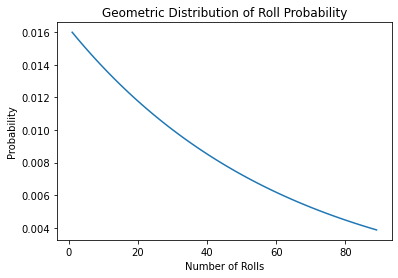

In [26]:
p= .016
#To perform a geometric distribution, we need to prepare the number of trials. In our case, 89 trials is what we want to test, since we know the 90th is a guaranteed 5 star if none were attained before.
X = np.arange(1,90,1)
#With our probability and the number of total trials/iterations to perform, we can calculate the commulative probability to attain the first 5 star at a certain roll point.
y = scipy.geom.pmf(X,p)
plt.plot(X,y)
plt.title('Geometric Distribution of Roll Probability')
plt.ylabel('Probability')
plt.xlabel('Number of Rolls')
for x in X:
    print('Probability that one would roll', x,'roll(s) or less until first success:', round((100*scipy.geom.cdf(x, p)), 2) , '%')


From the CDF values, one would only have a 50% change of attaining a 5 star by the 44th roll. Our cummulative probabilities doesn't even reach 80% to 90% by the 80th to 89th roll. 

## Costs of Rolls
<center><img src="https://img.game8.co/3289481/34ecdaca3909406df4b219f631ce63db.png/show"></center>

Primogems are the special currency in game that rolls are bought with. Each roll costs ***160*** primogems. The unit cost of primogems is around 0.0157 USD. Let's do some simple roll costs, based on our three numbers of rolls computed previously:

\begin{equation}
Each\ roll\ will\ cost = (0.0157 * 160) \approx $2.51
\end{equation}
\begin{equation}
Our\ simulation\ had\ an\ average\ of\ 55\ rolls\ per\ 5\ star\ item = ($2.51 * 55) \approx $138.16
\end{equation}
\begin{equation}
Our\ computed\ expected\ value\ was\ 63\ rolls = ($2.51 * 63) \approx $158.13
\end{equation}
\begin{equation}
Our\ linear\ model\ predicted\ 70\ rolls\ per\ 5\ star\ item = ($2.51 * 70) \approx $175.70
\end{equation}

So, we have a range of ***potential*** (Values could exceed or be below this range) costs from 138.16 to 175.70 USD just to attain one 5 star item. 

## Potential Yearly Primogem Gain Amongst Players
Now, we will speculate how many primogems a certain player may accumulate over the course of a non-leap year (365 days). This will be related to the number of 5 star characters that sum may attain, as well as the potential cost of those primogems if one buys them outright.
To calculate potential costs, we need to calculate how many primogems players may obtain in a standard year. Their activties and respective primogem gains are detailed below:



We have grouped players into four general categories: Casual Free to Play, Hardcore Free to Play, Casual Whale, and Hardcore Whale. Each category of players will have specific actions and purchases they may take. Two main subgroups exists: 
* Free to Play (F2P) - Players who spend no money on the game.
* Whales - Players who spend little to whopping, even egregious amounts of money. Take a look at this blog here around whales in gacha games: [Mobile Game Whales](https://www.blog.udonis.co/mobile-marketing/mobile-games/mobile-games-whales#:~:text=A%20mobile%20gaming%20whale%20is,booster%20packs%2C%20cosmetics%2C%20etc.).

### Casual Free to Play
The Casual F2P may pursue the following actities:
* Daily Commissions: Daily activities that may net the player up to 60 primogems. 
* Spiral Abyss: Each spiral Abyss level will net a one time reward of 300 primogems. There are 8 levels. 
* Battle Pass Awards: Occurs every 40 days, netting up to 5 awards, each 160 primogems each

To best capture how the casual F2P may play, we will run a randomize function on the values above, since a casual player may not work towards attaining the max primogems possible. We will simulate this 10,000 times and take the average to attain a more precise sum.

In [11]:
potentialSum = 0
iterations = 10000
# primo = pd.DataFrame(columns= ['Sum'])
for i in range (iterations):
    #Each daily activity will net primogems in increments of 10, for a potential total of 60. There are 360 days in a year
    dailyGems= 360 * ra.randrange(0, 60, 10)
    #Each spiral Abyss level will net a one time reward of 300 primogems. There are 8 levels. 
    spiralAbyss = 300 * ra.randrange(0, 3, 1)
    #Free to play battle pass awards grant 5 occurences of 160 primogems. The Casual Free to Play may not obtain all 5.There are 9 40 day periods in a year
    battlePass = 9 * 160 * ra.randrange(0, 5, 1)
    potentialSum += dailyGems + spiralAbyss + battlePass
    # primo.loc[i, 'Sum'] = dailyGems + spiralAbyss + battlePass
# sns.histplot(data= primo, x="Sum").set_title('Frequency of Potential Sums')
averageF2P = potentialSum//iterations
print('Potential yearly sum from Casual F2P activities: ' , averageF2P)

Potential yearly sum from Casual F2P activities:  12224


### Hardcore Free to Play
The Hardcore F2P may pursue the following actities:
* Daily Commissions: Daily activities that may net the player up to 60 primogems. 
* Spiral Abyss: Each spiral Abyss level will net a one time reward of 300 primogems. There are 8 levels. 
* Battle Pass Awards: Occurs every 40 days, netting up to 5 awards, each 160 primogems each

To best capture how the Hardcore F2P may play, we will run a randomize function on ***some*** the values above, since even a hardcore free-to-play may not work towards, or even be able to attain the max primogems possible. We will simulate this 10,000 times and take the average to attain a more precise sum.

In [12]:
potentialSum = 0
for i in range (iterations):
    #Each daily activity will net primogems in increments of 10, for a potential total of 60.The Hardcore F2P will finish all daily commissions There are 360 days in a year
    dailyGems= 360 * 60
    #Each spiral Abyss level will net a one time reward of 300 primogems. There are 9 levels. Hardcore to F2P may play from at least 3 levels to 8 levels, since the upper levels are extremely         difficult
    spiralAbyss = 300 * ra.randrange(3, 8, 1)
    #Free to play battle pass awards grant 5 occurences of 160 primogems. 
    battlePass = 9 * 160 * 5
    potentialSum += dailyGems + spiralAbyss + battlePass
averageHardF2P = potentialSum//iterations
print('Potential yearly sum from Hardcore F2P activities: ' , averageHardF2P)

Potential yearly sum from Hardcore F2P activities:  30300


### Casual Whales
The Casual Whale may pursue the following actities:
* Daily Commissions: Daily activities that may net the player up to 60 primogems. 
* Spiral Abyss: Each spiral Abyss level will net a one time reward of 300 primogems. There are 8 levels. 
* Premium Battle Pass Awards: Occurs every 40 days, netting up to 9 awards, each 160 primogems each. This costs ***$9.99*** per Battle Pass period
* Monthly Pass: This will award the player 90 primogems per day. This costs ***$4.99*** per month.

To best capture how the Casual Whales may play, we will run a randomize function on ***some*** the values above, since a casual whale may not work towards attaining the max primogems possible. We will simulate this 10,000 times and take the average to attain a more precise sum.

In [13]:
potentialSum = 0
for i in range (iterations):
    #Each daily activity will net primogems in increments of 10, for a potential total of 60. There are 360 days in a year
    dailyGems= 360 * ra.randrange(0, 60, 10)
    #Each spiral Abyss level will net a one time reward of 300 primogems. There are 9 levels. Like Hardcore to F2P, Casual Whales may play from at least 3 levels to 8 levels, since the upper          levels are extremely difficult
    spiralAbyss = 300 * ra.randrange(3, 8, 1)
    #Premium battle pass awards grant 9 occurences of 160 primogems. The last premium awards an extra 680 primogems
    battlePass = 9 * ((160 * 9) + 680)
    #90 primogems per day.
    monthlyPass = 90 * 365
    potentialSum += dailyGems + spiralAbyss + battlePass + monthlyPass
averageWhale = potentialSum//iterations
print('Potential yearly sum from Casual Whale activities: ' , averageWhale)

Potential yearly sum from Casual Whale activities:  62459


### Hardcore Whales
The Hardcore Whale may pursue the following actities:
* Daily Commissions: Daily activities that may net the player up to 60 primogems. 
* Spiral Abyss: Each spiral Abyss level will net a one time reward of 300 primogems. There are 8 levels. 
* Premium Battle Pass Awards: Occurs every 40 days, netting up to 9 awards, each 160 primogems each. This costs ***$19.99*** per Battle Pass period because the Hardcore whale will purchase the more expensive version, which gives free progress (basically the player can skip levels and advanced quicker)
* Monthly Pass: This will award the player 90 primogems per day. This costs ***$4.99*** per month.

Hardcore Whales will attain everything possible from these sources.

In [14]:
potentialSum = 0
for i in range (iterations):
    #Each daily activity will net primogems in increments of 10, for a potential total of 60. There are 360 days in a year
    dailyGems= 360 * 60
    #Each spiral Abyss level will net a one time reward of 300 primogems. There are 9 levels. Like Hardcore to F2P, Casual Whales may play from at least 3 levels to 8 levels, since the upper          levels are extremely difficult
    spiralAbyss = 300 * 8
    #Premium battle pass awards grant 9 occurences of 160 primogems. The last premium awards an extra 680 primogems
    battlePass = 9 * ((160 * 9) + 680)
    #90 primogems per day.
    monthlyPass = 90 * 365
    potentialSum += dailyGems + spiralAbyss + battlePass + monthlyPass
averageHardWhale = potentialSum//iterations
print('Potential yearly sum from Casual Whale activities: ' , averageHardWhale)

Potential yearly sum from Casual Whale activities:  75930


<center><img src="https://static2.gamerantimages.com/wordpress/wp-content/uploads/2020/10/genshin-impact-five-star-characters.jpg?q=50&fit=crop&w=960&h=500" width = "500" height= "250"></center>

## Primogems, Rolls, Costs: Got to Catch Them All?

To summarize, here are the potential year sum for each category of player:


In [15]:
print('Potential yearly sum from Casual F2P activities: ' , averageF2P)
print('Potential yearly sum from Hardcore F2P activities: ' , averageHardF2P)
print('Potential yearly sum from Casual Whale activities: ' , averageWhale)
print('Potential yearly sum from Hardcore Whale activities: ' , averageHardWhale)

Potential yearly sum from Casual F2P activities:  12224
Potential yearly sum from Hardcore F2P activities:  30300
Potential yearly sum from Casual Whale activities:  62459
Potential yearly sum from Hardcore Whale activities:  75930


About how many rolls do theses values covert to?

In [16]:
print('Casual F2P: ' , averageF2P//160, ' rolls') 
print('Hardcore F2P: ' , averageHardF2P//160, ' rolls') 
print('Casual Whale: ' , averageWhale//160, ' rolls') 
print('Hardcore Whale ' , averageHardWhale//160, ' rolls') 

Casual F2P:  76  rolls
Hardcore F2P:  189  rolls
Casual Whale:  390  rolls
Hardcore Whale  474  rolls


How many 5 Star Items can this translate into? We will use our simulated average of 55 rolls per 5 star as a upper bound, and our linear model's predicted 70 rolls per 5 star as a lower bound.

In [17]:
print('Casual F2P: ' , round((averageF2P//160)/70), 'to', round((averageF2P//160)/55), ' 5 star items') 
print('Hardcore F2P: ' , round((averageHardF2P//160)/70), 'to', round((averageHardF2P//160)/55), ' 5 star items') 
print('Casual Whale: ' , round((averageWhale//160)/70), 'to', round((averageWhale//160)/55), ' 5 star items')  
print('Hardcore Whale ' , round((averageHardWhale//160)/70), 'to', round((averageHardWhale//160)/55), ' 5 star items')  

Casual F2P:  1 to 1  5 star items
Hardcore F2P:  3 to 3  5 star items
Casual Whale:  6 to 7  5 star items
Hardcore Whale  7 to 9  5 star items


Based the calculations above, even for whales, it takes about a ***year*** to attain not even all of the 5 star characters guranteed. Thus, it is often the case whales would not only buy the battle pass and monthly pass, but they have a chance of purchasing additional primogems seperately. Note the unit cost of a primo gem is 0.0154 USD.

We will compute a new set of values that captures, **only in lucky sernarios**, the amount of money whales may spend on obtaining a certain number or certain selection of 5 star characters.

### Casual Whales
* They have bought the Monthly pass for each month: $4.99 per month
* They have bought the Premium Battle pass for each 40 day period: $9.99 per period
* They are determined to obtain  1 particular 5 star character. They are **9** 5 star characters in total. As a result, there is a 1/9 chance of obtain the once you want. Like what we computed before, the expected number of times until you get the one you want is:

\begin{equation}
E(times) = 1/ p
\end{equation}
\begin{equation}
E(times) = 1/(1/9) \approx 9 \;times
\end{equation}


This means that I expected to roll 9 5 Star Character until one obtains the character he/she wants. Since the expected number of rolls per 5 star was computed to be 63, we can calculate the costs as follows:

In [18]:
monthyPassSum = 12 * 4.99
#There are 9 40 day periods in a year
battlePassSum = 9 * 9.99
#160 primogems per roll, times expected value of rolls per 5 star, times the expected value of 5 stars to roll for until one gets the particular character, times the unit cost of a primogem
primogemSum = 160 * 63 * 9 * .0154
print('Potential (Lucky Case Senario) Cost: ' , (monthyPassSum + battlePassSum + primogemSum), ' USD')

Potential (Lucky Case Senario) Cost:  1546.878  USD


### Hardcore Whales
* They have bought the Monthly pass for each month: $4.99 per month
* They have bought the Advanced Premium Battle pass for each 40 day period: $19.99 per period
* They are determined to obtain  all 9 5 star characters. 


In [19]:
monthyPassSum = 12 * 4.99
#There are 9 40 day periods in a year
battlePassSum = 9 * 19.99
#160 primogems per roll, times expected value of rolls per 5 star, times the expected value of 5 stars to roll for until one gets the particular character, times the unit cost of a primogem.
#This is a multiplied 9 times, since the Hardcore whale will want to obtain all 9 Characters
primogemSum = (160 * 63 * 9 * .0154) * 9
print('Potential (Lucky Case Senario) Cost: ' , (monthyPassSum + battlePassSum + primogemSum), ' USD')

Potential (Lucky Case Senario) Cost:  12813.582  USD


This is a disturbance in the Force. Potentially, a whale may spend thousands of dollars on Genshin Impact, a Free to Play game, in one or more sittings, not throughout the year. It is important to note that it is not guarenteed to attain a unique 5 star character every time you attain a 5 star; there are repeats. Furthermore, whales may not be finished after attaining all 9 characters, for they can use to repeated 5 star character drops to level up those respective drops, for a total of 6 times. A player may go for 6 drops per 9 5 star character (54 times). 

These...calculations may seem like speculation; who would rationally spend this amount of money? It seems that there are people who do: 

[Mtashed's $2000 Genshin Impact Blowout](https://www.polygon.com/2020/10/30/21540515/genshin-impact-gacha-f2p-mtash-tectone-wish-giving-up-youtube-mihoyo-ps4-whales)

[Tectone Spends more than $5000 on Genshin Impact](https://www.youtube.com/watch?v=Jiubf8FbvO8)

Most likely, these are not the only examples. Otherwise, how else could Genshin Impact generate [$400 Million Dollars](https://sensortower.com/blog/genshin-impact-first-two-months-revenue#:~:text=On%20average%2C%20Genshin%20Impact%20has,30.5%20percent%20of%20total%20revenue.)?

## Potential Economic Impact 

Given that we have now calculated how much money on average would be needed for each target demographic, now lets see how much pursuing any one of those paths will impact someone's economic position. For this section, we used data gathered from the 2018 - 2019 US census on median income, and compared them to the values calculated above. 

Source: https://www.census.gov/library/publications/2020/demo/p60-270.html#:~:text=Median%20household%20income%20was%20%2468%2C703,and%20Table%20A%2D1).

In [20]:
# Clean up the table
pd.option_context('display.max_rows', None, 'display.max_columns', None)
df = pd.read_excel('tableA1.xlsx')
df.columns = ['Characteristic', 'Number in Thousands 2018', 'Median income Estimate', 
              'Median income Margin of Error', 'Number in Thousands 2019', 
              'Median Income Estimate', 'Median Income Margin of Error',
              'Percent change from median income 2018 - 2019 estimate', 
              'Percent change from median income 2018 - 2019 margin of error']
df = df.dropna()
df

,Characteristic,Number in Thousands 2018,Median income Estimate,Median income Margin of Error,Number in Thousands 2019,Median Income Estimate,Median Income Margin of Error,Percent change from median income 2018 - 2019 estimate,Percent change from median income 2018 - 2019 margin of error
2,All households,128579.0,64324.0,704.0,128451.0,68703.0,904.0,6.8,1.55
4,Family households,83482.0,82124.0,676.0,83677.0,88149.0,1113.0,7.3,1.47
5,...Married-couple,61959.0,95351.0,1145.0,62342.0,102308.0,1022.0,7.3,1.53
6,"...Female householder, no spouse present",15043.0,45946.0,1136.0,14832.0,48098.0,985.0,4.7,2.92
7,"...Male householder, no spouse present",6480.0,62632.0,1269.0,6503.0,69244.0,2988.0,10.6,5.05
8,Nonfamily households,45096.0,38813.0,840.0,44774.0,41232.0,466.0,6.2,2.28
9,...Female householder,23515.0,32587.0,679.0,23470.0,34612.0,851.0,6.2,3.05
10,...Male householder,21582.0,46583.0,884.0,21304.0,48496.0,1252.0,4.1,3.13
12,White,100528.0,68156.0,657.0,100568.0,72204.0,800.0,5.9,1.25
13,"...White, not Hispanic",84727.0,71922.0,664.0,84868.0,76057.0,876.0,5.7,1.25


This table, once cleaned up, still has a lot of data. However, we want to observe a couple demographics for our analysis. 

First off, age should definetely be something to look at, because Genshin Impact, and video games in general, has a greater appeal to children, people in their teens, and young adults. For this reason, we look at age range 15 - 24 and age range 24 - 35, since those ranges best describe the age of the players of Genshin Impact

Next, we should consider the familial situation of each player. We do this by looking at married and unmarried males, and married and unmaried females. 

Finally, we decided to partition the country of America into different regions - Northeast, Midwest, Southwest, and West. This is because the socioeconomic conditions in America vary greatly depending on what region you live in; for example, there is more money councentrated in the Northeast and West than there is in the Midwest, which is still very agrarian, and the Southwest, which does not have as many economic centers of commerce or business.

Using these 10 subdivisions, we created pie charts based on all those demographics' median incomes, where we counted how much of their total median income would be spent on the game depending on their playstyle (casual whale or hardcore whale). The values of potential expenditure on this game were speculated above.

Below is the function we used to create the pie graphs, where classification is a string that determines which spending habit we want to measure against our chosen demographics:

In [21]:
def create_pie_graphs(classification):

    # Pull from these 10 demographics, given by indexes from table
    indexes = [6, 7, 9, 10, 19, 20, 31, 32, 33, 34]
    labels = 'Spent Cost', 'Other'
    
    # Decide what the expenditure will be - if the player is a casual or hardcore whale
    expenditure = 12813.582
    if classification == 'casual':
        expenditure = 1546.878

    # Format a figure with 10 subplots - 1 pie chart for each demographic
    fig, axes= plt.subplots(2, 5, figsize = (15, 7))
    
    # Graph each demographic one by one
    for index, (l, ax) in zip(indexes, enumerate(axes.flatten())):
        # Calculate percentage of income being spent on the game
        income = df.loc[index, 'Median income Estimate']
        percentage1 = (expenditure / income) * 100
        difference = 100 - percentage1
        
        # Determine the partitions that will be represented on the pie graph
        sizes1 = [percentage1, difference]

        # Create the graphs. Handle
        _, _, autotexts = ax.pie(sizes1, labels=labels, radius = 1.1, 
                                 explode=(0, 0.10), autopct="%.0f%%", startangle=80)
        
        # Tidy up names of graphs
        graph_name = df.loc[index, 'Characteristic']
        graph_name = graph_name.replace('...', '')
        graph_name = graph_name.replace(', no spouse present', ' (s)')
        ax.set_title(graph_name)
        
        # Set the color of all percentages to be white, for readability
        for i in autotexts:
            i.set_color('white')
        
    # Display the graphs
    plt.show()
    



## Casual Whale (Speculated to Spend: 1546.878  USD)

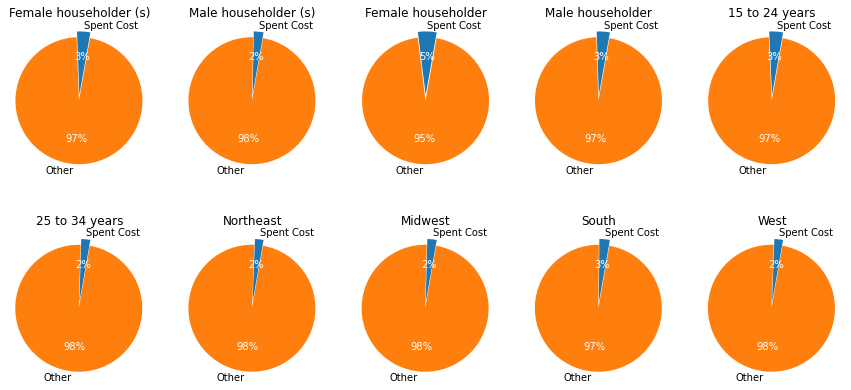

In [22]:
create_pie_graphs('casual')

Based on the graphs above, we can see the amount of money spent on Genshin Impact (Blue) is only a small part of each group's expected income. Percentage of money spent on the game is still around 2% to 5% of someone's total income, which, while not a staggering amount, is still a mildly large amount to spend on a single pasttime. It is also worth noting that by a report filed by the US Bureau of Labor, the average percentage of annual income spent on entertainment should average out to be 3% of someone's total annual income. 

Source: https://www.bls.gov/news.release/cesan.nr0.htm

## Hardcore Whale (Speculated to Spend: 12813.582 USD)

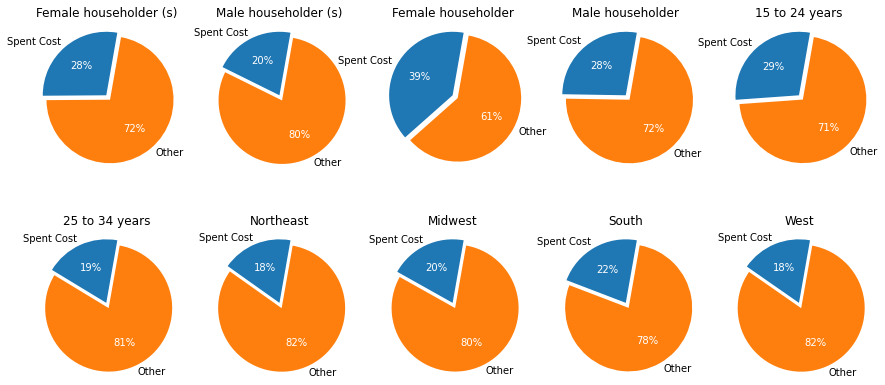

In [23]:
create_pie_graphs('hardcore')

Based on the graphs above, we can see the amount of money spent on Genshin Impact (Blue) is a much larger portion of someone's expected income. It is with these graphs that we can really analyze how destructive this type of spending could be. With a range of 18% to as high as 39% of someone's annual income, this is a significant amount of money to spend on a video game. We can also see some more pronounced differences on how this would affect you:

* If you live in the Northeast or West, you will be spending a significant amount, but it wouldn't be as much money taken out of your annual income as if you were living in the South or Midwest
* In both married and unmarried males and females, females are more adversely affected than males.
* People around 15 - 24 (teens and young adults) are hit harder than their older counterparts (25-34)

Nevertheless, all these values are much higher than what the average household may spend on entertainment.

<center><img src= "https://upload-os-bbs.mihoyo.com/upload/2020/11/17/46245001/8671f4cf2b5deda2c6bd9fbf15495c50_8835428658825674955.png?x-oss-process=image/resize,s_740/quality,q_80/auto-orient,0/interlace,1/format,png" width= "900" height= "400"></center>

## **Fin**

Our objectives were to analyze the probabilities of attaining 5 star items and studying the costs of attempting to do so. Our research, though heavy with speculation and assumptions, is based in statistical analysis and logical reasoning. All summon and cost data were pulled directly from the game and simulators that were created with true Genshin Impact probabilites and math. We used data modeling techniques to help visualize your odds as well as the potential economic impact of spending money. 

We hope that by analyzing the monetary costs of ***gambling*** in Genshin Impact may persuade people be cautious in how much money they spend. The game is free-to-play, and the company behind it invested heavily into making a fully devoloped, open world game with deep and intriguing lore. Players may choose to spend some money to buy the monthly pass or other packages to help support the company. However, it is a gacha game, and those with gambling addictions should be wary of what they may be spending for. The game can be played totally without spending a single dollar, and none of the 5 star characters are game breaking or changing. 

There are plenty more ways to analyze economic costs of Genshin Impact. Instead of money, one could study the cost of time spent. What could be the opportunity cost of spending hours on this addicting game? Of course that research is difficult, for data may be hard to find, and the interpretation and analysis of that data would be mostly speculative. It would have been interesting though to ponder about.

I hope our speculative yet statistical analysis was fun to explore. We highly recommend this game, for the world, characters, lores, gameplay mechanics, and the community you can be immersed in is well worth your time, and best of all its free to play! Hope you have fun with Genshin Impact traveler - we sure did!

